# Workbook (part 5) - Environmental Variables and Blue Carbon Storage #

In [134]:
!pip install pandas requests matplotlib plotly --quiet

In [135]:
# Import essential libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

## **Step 1: Environmental Understanding**

Step 1 paragraph: 

Station 62149 (West Sole “A” AWS) is located in the southern North Sea near the Humber Estuary, UK. It is situated within a high-sediment shelf sea environment that is critical to blue carbon cycling. Organic matter cycles into this region from estuarine and coastal inputs, where wave and wind dynamics influence carbon burial (Shutler et al., 2019). Wind speed, wave height, and air temperature will therefore be analysed. As the southern North Sea a known carbon sink under pressure from anthropogenic activities, these variables will help to explore how wind and wave conditions influence sediment disturbance in this region, with implications for blue carbon storage (Diesing et al., 2021). 

## **Step 2: Data Understanding**

**2.1. Import the URL for Station 62149 directly**

Real-time buoy data was retrieved from NOAA: https://www.ndbc.noaa.gov/faq/realtime.shtml 

In [136]:
# Station 62149 direct URL
station_62149_url = 'https://www.ndbc.noaa.gov/data/realtime2/62149.txt'

# Fetch the latest data
response = requests.get(station_62149_url)
raw_data = response.text

# Parse the data
data_io = StringIO(raw_data)

# Load into dataframe
df = pd.read_csv(data_io, delimiter=r'\s+', skiprows=1, header=0, na_values=['MM', 'NaN', ''])

df.columns = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Wind Direction (degT)', 'Wind Speed (m/s)', 'Gust Speed (m/s)', 
              'Wave Height (m)', 'Dom Wave Period (sec)', 'Average Wave Period (sec)', 'Wave Direction (degT)', 'Pressure (hPa)', 
              'Air Temperature (degC)', 'Water Temperature (degC)', 'Dew Point (degC)', 'Visibility (nmi)', 'Pressure Tendency (hPa)', 'Tide (ft)']

# Preview the data
df.head()

,Year,Month,Day,Hour,Minute,Wind Direction (degT),Wind Speed (m/s),Gust Speed (m/s),Wave Height (m),Dom Wave Period (sec),Average Wave Period (sec),Wave Direction (degT),Pressure (hPa),Air Temperature (degC),Water Temperature (degC),Dew Point (degC),Visibility (nmi),Pressure Tendency (hPa),Tide (ft)
0,2025,5,28,23,0,170,7.2,NaN,0.4,NaN,NaN,NaN,1019.8,12.5,NaN,10.5,11,-0.1,NaN
1,2025,5,28,22,0,170,6.7,NaN,0.4,NaN,NaN,NaN,1019.9,11.9,NaN,10.2,11,0.7,NaN
2,2025,5,28,21,0,170,5.1,NaN,0.4,NaN,NaN,NaN,1020.1,11.8,NaN,10.0,11,1.0,NaN
3,2025,5,28,20,0,170,4.6,NaN,0.4,NaN,NaN,NaN,1019.9,11.8,NaN,9.4,11,1.1,NaN
4,2025,5,28,19,0,170,4.1,NaN,0.3,NaN,NaN,NaN,1019.2,11.8,NaN,8.9,11,1.0,NaN


**2.2. Investigate Dataset**

Here, the shape of the dataset, its data types, and any missing values are assessed. This ensures that the dataset is ready for further analysis. 

In [137]:
# Shape of the dataset
df.shape

# Data types and non-null counts
df.info()

# Look at missing values
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       25 non-null     int64  
 1   Month                      25 non-null     int64  
 2   Day                        25 non-null     int64  
 3   Hour                       25 non-null     int64  
 4   Minute                     25 non-null     int64  
 5   Wind Direction (degT)      25 non-null     int64  
 6   Wind Speed (m/s)           25 non-null     float64
 7   Gust Speed (m/s)           0 non-null      float64
 8   Wave Height (m)            25 non-null     float64
 9   Dom Wave Period (sec)      0 non-null      float64
 10  Average Wave Period (sec)  0 non-null      float64
 11  Wave Direction (degT)      0 non-null      float64
 12  Pressure (hPa)             25 non-null     float64
 13  Air Temperature (degC)     25 non-null     float64
 

Year                          0
Month                         0
Day                           0
Hour                          0
Minute                        0
Wind Direction (degT)         0
Wind Speed (m/s)              0
Gust Speed (m/s)             25
Wave Height (m)               0
Dom Wave Period (sec)        25
Average Wave Period (sec)    25
Wave Direction (degT)        25
Pressure (hPa)                0
Air Temperature (degC)        0
Water Temperature (degC)     25
Dew Point (degC)              0
Visibility (nmi)              0
Pressure Tendency (hPa)       0
Tide (ft)                    25
dtype: int64

Step 2 paragraph:

The dataset was retrieved using the direct NOAA URL for Station 62149, containing 25 hourly observations across 48 hours. Key environmental variables such as wind speed, wave height, and air temperature were complete and consistent. Six columns had no values, meaning that this information was not recorded by Station 62149 possibly due to equipment constraints or study designs. As they were not relevant to this analysis, imputing the values was unnecessary, and so they would need to be removed from the dataset. The original column titles were further renamed to maintain clarity across the dataset (#yr to Year, for example).

## **Step 3: Data Preparation**

The dataset was cleaned and prepared in support of later time-series analysis. 

**3.1. Handling missing values**

In [138]:
# Ensure consistent formatting across null values
df.replace([None, 'NaN', ''], pd.NA, inplace=True)

In [139]:
# Convert columns to numeric
numeric_cols = ['Wind Speed (m/s)', 'Gust Speed (m/s)', 'Wave Height (m)', 'Air Temperature (degC)', 'Water Temperature (degC)', 'Pressure (hPa)']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       25 non-null     int64  
 1   Month                      25 non-null     int64  
 2   Day                        25 non-null     int64  
 3   Hour                       25 non-null     int64  
 4   Minute                     25 non-null     int64  
 5   Wind Direction (degT)      25 non-null     int64  
 6   Wind Speed (m/s)           25 non-null     float64
 7   Gust Speed (m/s)           0 non-null      float64
 8   Wave Height (m)            25 non-null     float64
 9   Dom Wave Period (sec)      0 non-null      float64
 10  Average Wave Period (sec)  0 non-null      float64
 11  Wave Direction (degT)      0 non-null      float64
 12  Pressure (hPa)             25 non-null     float64
 13  Air Temperature (degC)     25 non-null     float64
 

Columns with missing values not relevant to this analysis were therefore dropped to create a cleaner dataset. 

In [141]:
# Drop columns that have missing values
columns_to_drop = ['Gust Speed (m/s)', 'Dom Wave Period (sec)', 'Average Wave Period (sec)', 'Wave Direction (degT)', 'Water Temperature (degC)', 'Tide (ft)']

df.drop(columns=columns_to_drop, inplace=True)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     25 non-null     int64  
 1   Month                    25 non-null     int64  
 2   Day                      25 non-null     int64  
 3   Hour                     25 non-null     int64  
 4   Minute                   25 non-null     int64  
 5   Wind Direction (degT)    25 non-null     int64  
 6   Wind Speed (m/s)         25 non-null     float64
 7   Wave Height (m)          25 non-null     float64
 8   Pressure (hPa)           25 non-null     float64
 9   Air Temperature (degC)   25 non-null     float64
 10  Dew Point (degC)         25 non-null     float64
 11  Visibility (nmi)         25 non-null     int64  
 12  Pressure Tendency (hPa)  25 non-null     float64
dtypes: float64(6), int64(7)
memory usage: 2.7 KB


**3.2. Creating a datetime index**

A datetime index was generated by combining date and time columns to allow for temporal analysis. 

In [143]:
# Create datetime column
df['timestamp'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df.set_index('timestamp', inplace=True)

# Drop original time columns
df.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'], inplace=True, errors='ignore')

In [144]:
df.head()

,Wind Direction (degT),Wind Speed (m/s),Wave Height (m),Pressure (hPa),Air Temperature (degC),Dew Point (degC),Visibility (nmi),Pressure Tendency (hPa)
timestamp,,,,,,,,
2025-05-28 23:00:00,170,7.2,0.4,1019.8,12.5,10.5,11,-0.1
2025-05-28 22:00:00,170,6.7,0.4,1019.9,11.9,10.2,11,0.7
2025-05-28 21:00:00,170,5.1,0.4,1020.1,11.8,10.0,11,1.0
2025-05-28 20:00:00,170,4.6,0.4,1019.9,11.8,9.4,11,1.1
2025-05-28 19:00:00,170,4.1,0.3,1019.2,11.8,8.9,11,1.0


Step 3 paragraph:

The dataset was cleaned by first standardising missing values and converting relevant columns to numeric types. As previously mentioned, variables with entirely missing values were dropped to reduce noise and improve clarity. A datetime index was created by combining the data and time columns. This was essential for visualising hourly changes in the environmental conditions. The final dataset therefore includes only complete, relevant variables such as wind speed, wave height, and air temperature. This enables a more accurate time-series analysis and correlation analysis over the 48 hours. 

## **Step 4: Modelling**

To explore how the key variables (wind speed, wave height, and air temperature) interact with one another, summary statistics were calculated and relationships visualised.

**4.1. Exploratory Data Analysis (EDA)**

In [145]:
# Summary statistics for key variables
df[['Wind Speed (m/s)', 'Wave Height (m)', 'Air Temperature (degC)']].describe()

,Wind Speed (m/s),Wave Height (m),Air Temperature (degC)
count,25.00000,25.000000,25.00000
mean,3.71600,0.448000,13.02400
std,1.46506,0.058595,1.97279
min,1.00000,0.300000,11.10000
25%,3.10000,0.400000,11.40000
50%,3.60000,0.500000,12.10000
75%,4.10000,0.500000,14.30000
max,7.20000,0.500000,17.30000


**4.2. Visualise Environmental Trends**

The following plots show how wind speed, wave height, and air temperature change over the 48 hour time period 

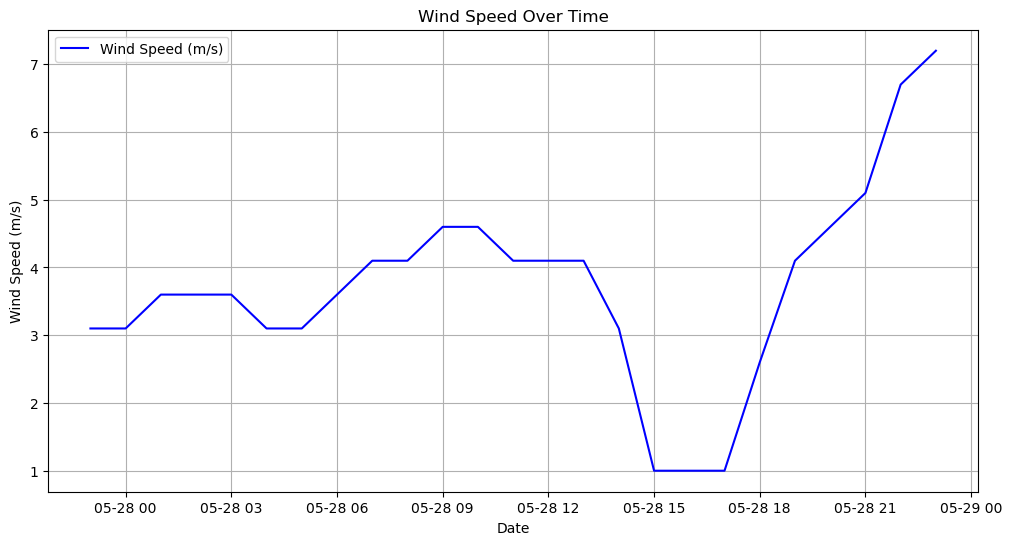

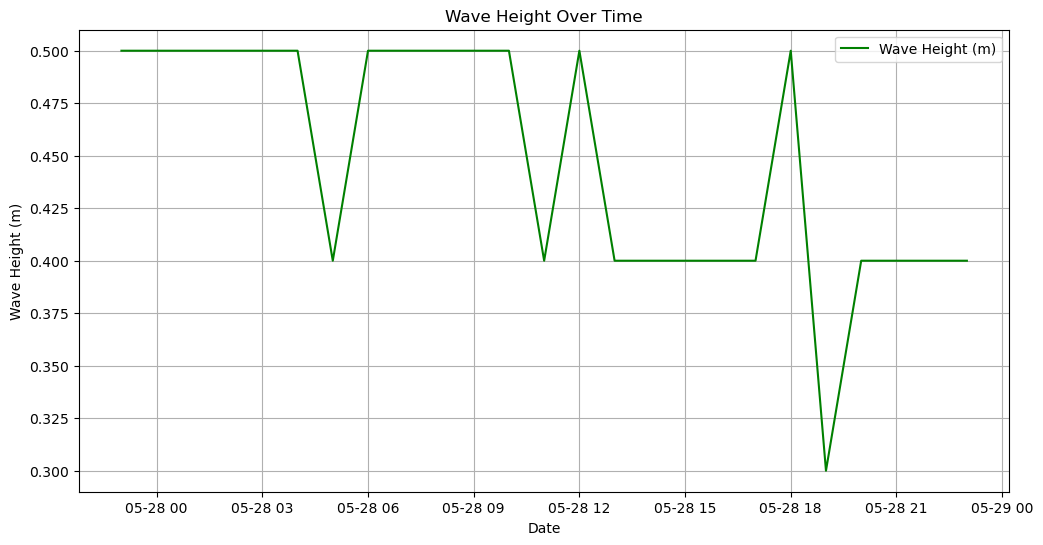

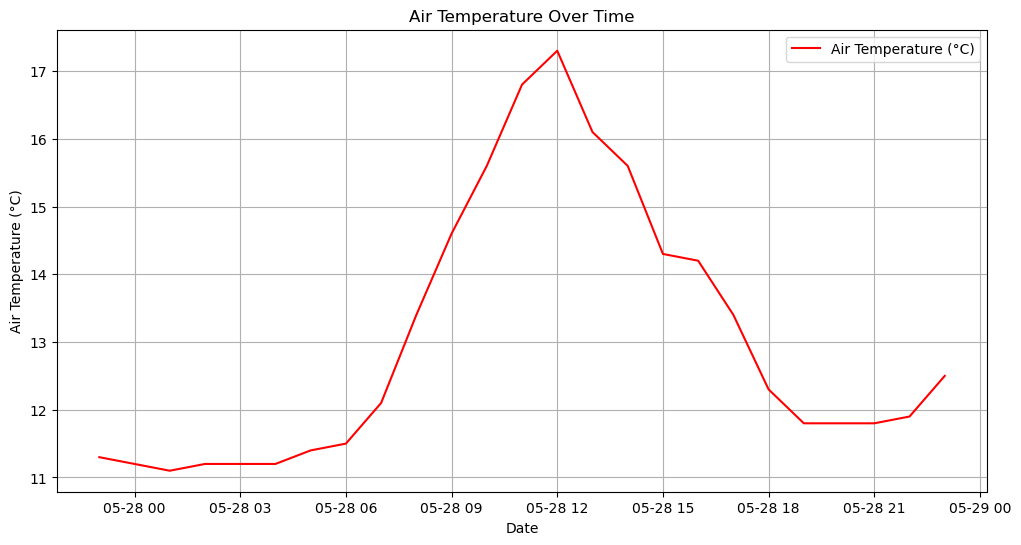

In [146]:
# Plot wind speed
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Wind Speed (m/s)'], label='Wind Speed (m/s)', color='b')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid(True)
plt.show()

# Plot wave height
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Wave Height (m)'], label='Wave Height (m)', color='g')
plt.title('Wave Height Over Time')
plt.xlabel('Date')
plt.ylabel('Wave Height (m)')
plt.legend()
plt.grid(True)
plt.show()

# Plot air temperature
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Air Temperature (degC)'], label='Air Temperature (°C)', color='r')
plt.title('Air Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Air Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

**4.3. Correlation Matrix**

Here, the relationships between the key variables have been examined to determime if there are any signficant relationships that may help to understand carbon cycling and sediment disturbance patterns.

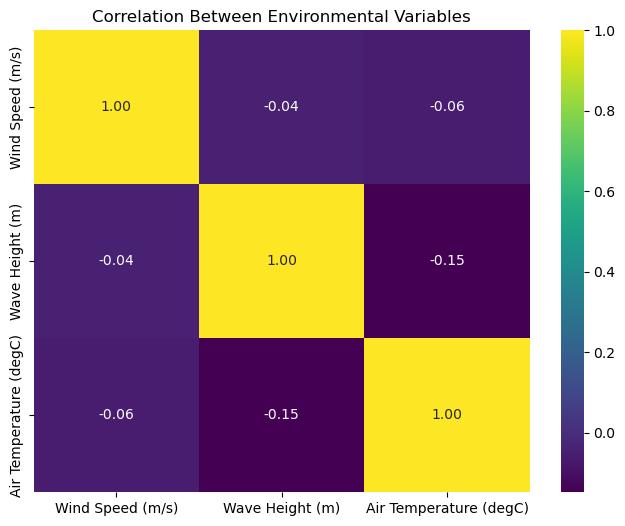

In [147]:
# Compute the correlation matrix between the key variables
correlation_matrix = df[['Wind Speed (m/s)', 'Wave Height (m)', 'Air Temperature (degC)']].corr()

# Visualise using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Between Environmental Variables')
plt.show()

**4.4. Linear Regression**

A linear regression model has been fitted between each of the variables.

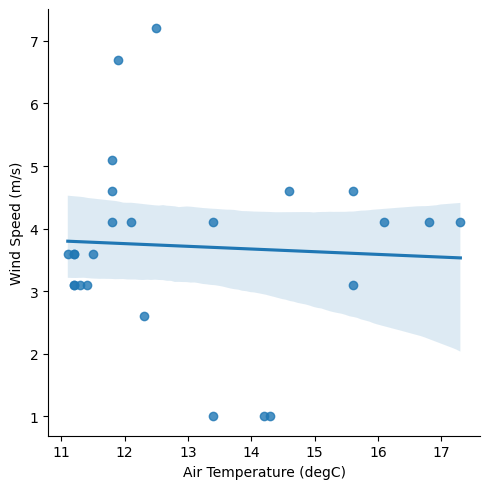

In [148]:
sns.lmplot(x='Air Temperature (degC)', y='Wind Speed (m/s)', data=df)

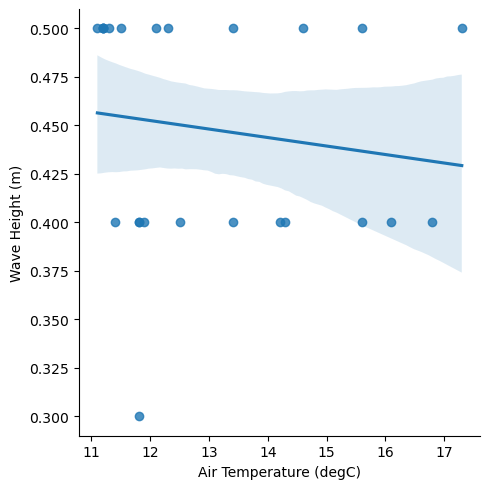

In [149]:
sns.lmplot(x='Air Temperature (degC)', y='Wave Height (m)', data=df)

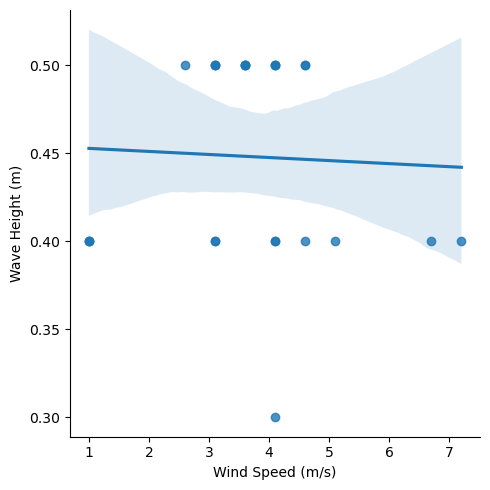

In [150]:
sns.lmplot(x='Wind Speed (m/s)', y='Wave Height (m)', data=df)

In [151]:
print(df.corr())

                         Wind Direction (degT)  Wind Speed (m/s)  \
Wind Direction (degT)                 1.000000          0.051536   
Wind Speed (m/s)                      0.051536          1.000000   
Wave Height (m)                       0.441973         -0.043295   
Pressure (hPa)                       -0.545355          0.163938   
Air Temperature (degC)                0.285938         -0.057948   
Dew Point (degC)                      0.445641          0.449265   
Visibility (nmi)                     -0.166905          0.029841   
Pressure Tendency (hPa)               0.461193         -0.251589   

                         Wave Height (m)  Pressure (hPa)  \
Wind Direction (degT)           0.441973       -0.545355   
Wind Speed (m/s)               -0.043295        0.163938   
Wave Height (m)                 1.000000       -0.706420   
Pressure (hPa)                 -0.706420        1.000000   
Air Temperature (degC)         -0.147354        0.345736   
Dew Point (degC)           

Step 4 paragraph:

A combination of time series plots, correlation analysis, and linear regression was used to explore relationships between environmental variables linked to sediment disturbance and blue carbon cycling. In this 48-hour period, all correlations between wind speed, wave height, and air temperature were weak (R < ±0.15), indicating little statistical association during the observed period. Linear regression also showed no meaningful trend between air temperature and wave height. This outcome may be expected, as the short timeframe likely limits the ability to detect more consistent patterns or episodic disturbance events. Whilst no strong relationships were identified, the modelling techniques applied are still useful tools for larger or more variable datasets. This pilot study supports the use of exploratory methods to gain a foundational understanding of the physical processes influencing carbon storage in coastal shelf systems.

## **Step 5: Evaluation**

Overall, this study provides a strong foundational understanding of environmental variability near the Humber Estuary. Time series, correlation, and regression techniques were applied to explore how wind speed, wave height, and air temperature may relate to sediment disturbance. No statistically meaningful relationships were found between the key variables, however. This can be attributed to the limited 48-hour timeframe, which is insufficient for capturing long-term patterns or seasonal variations. Similarly, it limits the strength and generalisability of the findings. Additionally, the absence of variables such as water temperature restricted the ecological context. For example, temperature influences the capacity of ecosystems like seagrass meadows to retain carbon (Macreadie and Hardy, 2018). A complete assessment of blue carbon requires a broader set of environmental inputs. Future studies requires data spanning longer timeframes, multi-station comparisons, and incorporated trawling or disturbance data to better contextualise carbon cycling. Outside of its limitations, this study does well to highlight the value of exploratory statistical tools in assessing real-time environmental conditions that may influence blue carbon storage.

## **Step 6: Deployment**

The dashboards below include three interactive plots of wind speed, wave height, and air temperature. This allows for real time exploration of environmental variables near the Humber Estuary.

**6.1. Interactive Plots for Key Variables**

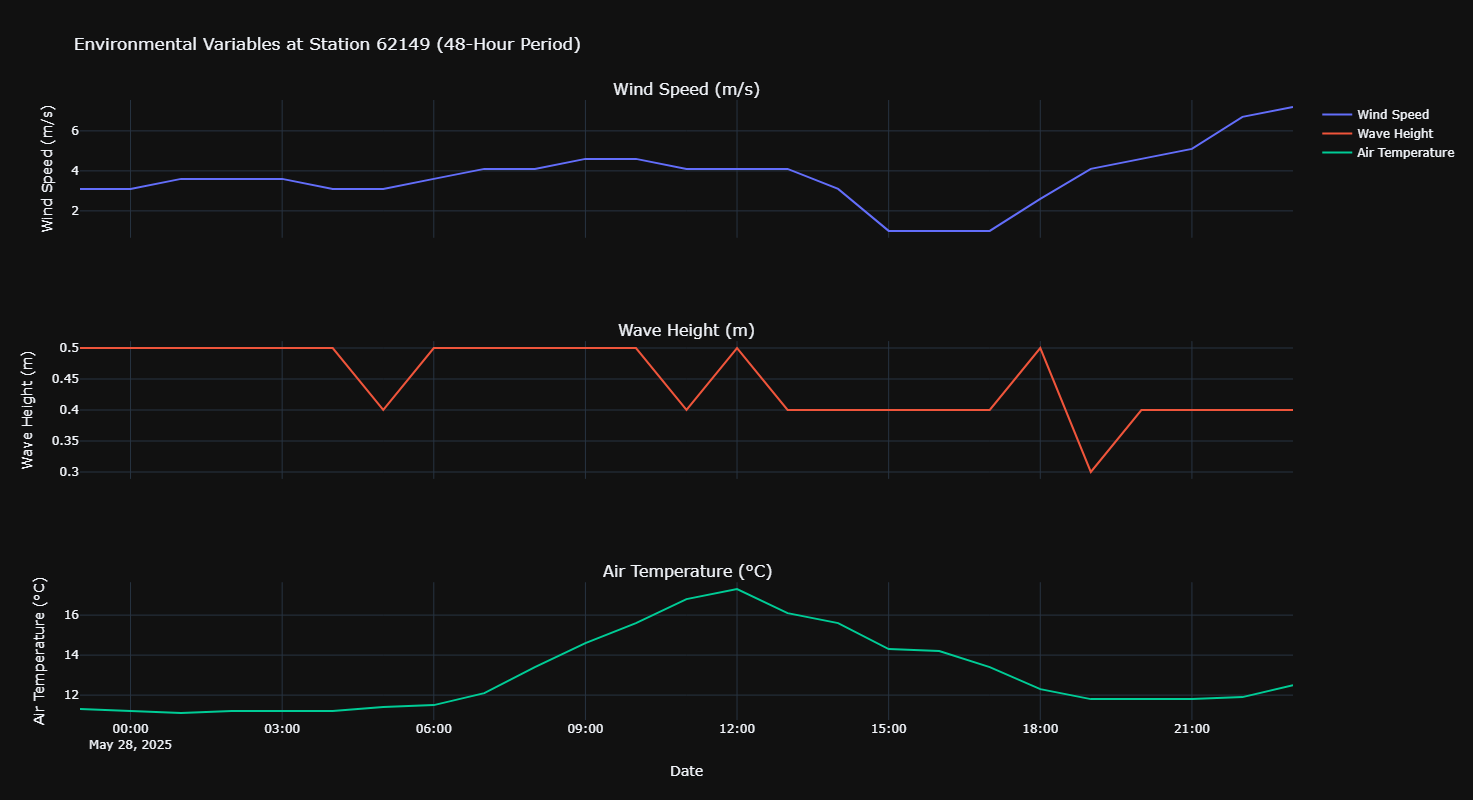

In [152]:
# Create the subplot for all key variables
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=['Wind Speed (m/s)', 'Wave Height (m)', 'Air Temperature (°C)'])

# Add wind speed
fig.add_trace(go.Scatter(x=df.index, y=df['Wind Speed (m/s)'], mode='lines', name='Wind Speed'), row=1, col=1)

# Add wave height
fig.add_trace(go.Scatter(x=df.index, y=df['Wave Height (m)'], mode='lines', name='Wave Height'), row=2, col=1)

# Add air temperature
fig.add_trace(go.Scatter(x=df.index, y=df['Air Temperature (degC)'], mode='lines', name='Air Temperature'), row=3, col=1)

# Format layout
fig.update_layout(height=800, width=1000, title='Environmental Variables at Station 62149 (48-Hour Period)', template='plotly_dark')
fig.update_xaxes(title_text='Date', row=3, col=1)
fig.update_yaxes(title_text='Wind Speed (m/s)', row=1, col=1)
fig.update_yaxes(title_text='Wave Height (m)', row=2, col=1)
fig.update_yaxes(title_text='Air Temperature (°C)', row=3, col=1)

fig.show()

## **References**

DeVries, T. 2022. The Ocean Carbon Cycle. Annual Review of Environment and Resources. **47**(1). [Online]. [Accessed 18 May 2025]. Available from: https://www.annualreviews.org/content/journals/10.1146/annurev-environ-120920-111307 

Diesing, M., Thorsnes, T. and Bjarnadóttir, L.R. 2021. Organic carbon densities and accumulation rates in surface sediments of the North Sea and Skagerrak. Biogeosciences. **18**(6), pp.2139–2160. [Online]. [Accessed 18 May 2025]. Available from: https://bg.copernicus.org/articles/18/2139/2021/

Macreadie, P. and Hardy, S. 2018. Response of Seagrass ‘Blue Carbon’ Stocks to Increased Water Temperatures. Diversity. **10**(4), p.115. [Online]. [Accessed 19 May 2025]. Available from: https://www.mdpi.com/1424-2818/10/4/115#:~:text=Seagrass%20meadows%20are%20globally%20important%20sinks%20of%20%E2%80%98Blue,capacity%20to%20sequester%20and%20retain%20organic%20carbon%20%28Corg%29 

Shutler, J.D., Holding, T., Ubelmann, C., Gaultier, L., Collard, F., Ardhuin, F., Chapron, B., Rio, M.-H. and Donlon, C. 2019. Wind, wave and current interactions appear key for quantifying cross-shelf transport and carbon export; new knowledge and the potential of SKIM to enable monitoring. arXiv (Cornell University). [Online]. [Accessed 18 May 2025]. Available from: https://arxiv.org/abs/1905.08687